In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time 

In [36]:
def resize(im):
    x = im.shape[0]
    y = im.shape[1]
    return im[int(x/3):int(2*x/3), int(y/3):int(2*y/3)]

In [37]:
def load_and_resize(path):
    # load the image, convert it to grayscale, and blur it
    image = cv2.imread(path)
    #plt.imshow(image)
    #plt.show()
    image = resize(image)
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    return imgRGB

In [38]:
def blur(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    seuil=170.0
    ret,seg_red = cv2.threshold(img,seuil,255.0,cv2.THRESH_BINARY_INV)
    #plt.imshow(seg_red)
    #plt.show()
    gray = cv2.GaussianBlur(seg_red, (7, 7), 0)
    #plt.imshow(gray)
    #plt.show()
    return gray


In [39]:
def transform(gray):
    edged = cv2.Canny(gray, 100, 100)
    #plt.imshow(edged)
    #plt.show()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    #plt.imshow(closed)
    #plt.show()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    #plt.imshow(closed)
    #plt.show()
    im2, cnts, hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return cnts

In [40]:
def find_screen(cnts, image):
    total = 0
    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        if (peri > 300):
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)

            # if the approximated contour has four points, then assume that the
            # contour is a book -- a book is a rectangle and thus has four vertices
            if len(approx) == 4:
                print("perimetre : ",peri)
                print("rectangle : ")
                print(approx)
                cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
                total += 1
                return approx

In [41]:
start_time = time.time()
imageRGB = load_and_resize('screen_red.png')
find_screen(transform(blur(imageRGB)),imageRGB)
print("--- %s seconds ---" % (time.time() - start_time))

perimetre :  332.3847759962082
rectangle : 
[[[203  79]]

 [[204 140]]

 [[305 140]]

 [[305  77]]]
--- 0.11071300506591797 seconds ---


In [42]:
imageRGB = load_and_resize('screen_red.png')

wanted_im = imageRGB[77:140, 200:305]
test = imageRGB[76:141, 199:306]

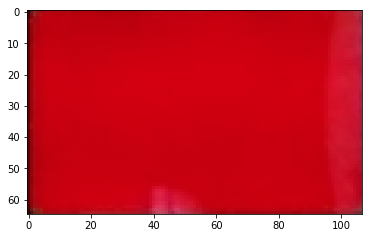

In [43]:
plt.imshow(test)
plt.show()